In [1]:
import numpy as np 
import pandas as pd 


In [2]:
file= r"C:\Users\ASUS\Desktop\customer.xlsx"
df= pd.read_excel(file)


In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df['Exited'].value_counts() 

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
#drop unusual contents like row names and also like column id

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
df_exited=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)


In [34]:
x= df_exited.drop(columns=['Exited'],axis=1)
y= df_exited['Exited']
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [35]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train) 
x_test_scaled= scaler.transform(x_test) 



In [36]:
import tensorflow  
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 


In [37]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6369 - loss: 0.6446 - val_accuracy: 0.7981 - val_loss: 0.4949
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8016 - loss: 0.4751 - val_accuracy: 0.8119 - val_loss: 0.4514
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 0.4290 - val_accuracy: 0.8081 - val_loss: 0.4380
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8195 - loss: 0.4322 - val_accuracy: 0.8106 - val_loss: 0.4285
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8315 - loss: 0.4081 - val_accuracy: 0.8200 - val_loss: 0.4207
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8313 - loss: 0.4076 - val_accuracy: 0.8231 - val_loss: 0.4106
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8303 - loss: 0.3995 - val_accuracy: 0.8338 - val_loss: 0.3941
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8404 - loss: 0.3886 - val_accu

In [45]:
model.layers[1].get_weights()  #get the individual weight 


[array([[ 0.05993534,  0.04983919,  0.61674666,  0.05243634, -0.08670063,
          0.13899265,  0.6581631 , -0.53528064,  0.20556575,  0.45018613,
         -0.01057996],
        [ 0.2932529 , -0.16920365, -0.1549503 , -0.6177191 ,  0.15492107,
          0.06422993, -0.22927764,  0.30604082, -0.1721581 ,  0.1478438 ,
         -1.0815778 ],
        [ 0.18589723, -0.33977476, -0.17903733,  0.3403178 ,  0.42256832,
         -0.01196644,  0.6722347 , -0.14712942,  0.35552338,  0.08503264,
         -0.08245527],
        [ 0.01999128, -0.10329817, -0.15361571, -0.50189596, -0.36095   ,
          0.96193945, -0.25412858, -0.7488747 , -2.0023649 , -0.23417762,
          0.9792727 ],
        [ 0.01355124,  0.55544245,  0.32030034,  0.53058296,  0.6538936 ,
          0.19222292, -0.06628809,  0.18055196, -0.0480335 , -0.19553299,
         -0.01064564],
        [ 0.21036953,  0.06420825,  0.4797202 ,  0.15456972,  0.04766317,
          0.4715461 , -0.08148245,  0.6637438 , -0.4396    ,  0.0432137

In [43]:
y_log= model.predict(x_test_scaled)  #predict whether the customer is there or not 

y_pred= np.where(y_log>0.5,1,0)  #if >0.5 then its taken as 1 else 0 

y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [44]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)


0.866

In [29]:
print(x_train.dtypes)
print(x_train.head())


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2694          628   Germany    Male   29       3  113146.98              2   
5140          626    France  Female   29       4  105767.28              2   
2568          612   Germany  Female   47       6  130024.87              1   
3671          646   Germany  Female   52       6  111739.40              2   
7427          714     Spain    Male   33       8  122017.19              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
2694          0               1        124749.08  
5140          0               0         41104.82  
2568          1               1         45750.21  
3671          0               1         683

In [46]:
import matplotlib.pyplot as plt 


In [47]:
history

In [48]:
history.history

{'accuracy': [0.7334374785423279,
  0.8045312762260437,
  0.8154687285423279,
  0.8193749785423279,
  0.8235937356948853,
  0.8271874785423279,
  0.8324999809265137,
  0.8395312428474426,
  0.8478124737739563,
  0.8531249761581421,
  0.8559374809265137,
  0.8581249713897705,
  0.8579687476158142,
  0.8579687476158142,
  0.8589062690734863,
  0.860156238079071,
  0.8609374761581421,
  0.8607812523841858,
  0.8620312213897705,
  0.8590624928474426,
  0.8621875047683716,
  0.862500011920929,
  0.8612499833106995,
  0.8615624904632568,
  0.8621875047683716,
  0.86328125,
  0.862500011920929,
  0.8631250262260437,
  0.8631250262260437,
  0.8620312213897705,
  0.8639062643051147,
  0.8642187714576721,
  0.8631250262260437,
  0.8648437261581421,
  0.8646875023841858,
  0.8635937571525574,
  0.86328125,
  0.8609374761581421,
  0.8628125190734863,
  0.8635937571525574,
  0.8639062643051147,
  0.8646875023841858,
  0.8628125190734863,
  0.8635937571525574,
  0.864062488079071,
  0.86359375715255

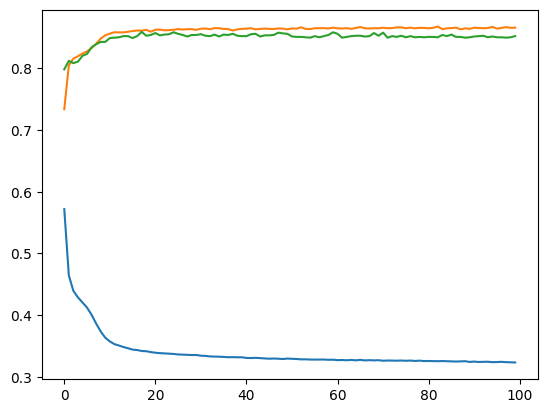

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
